<a href="https://colab.research.google.com/github/hdeldar/Hebbian-rule/blob/main/Hebbian_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# About
Professor: Jafar Pouramini

Student: Hassan Deldar

Lesson: Neural Networks ( Hebbian Learning Rule )

# Hebbian Learning Rule

- Also known as 'Hebb Learning Rule', was proposed by 'Donald O Hebb'.
- One of the 'first' and also easiest learning rules in the neural network.
- It is a single layer neural network, i.e. it has one input layer and one output layer.
- The input layer can have many units, say n. The output layer only has one unit.
- Hebbian rule works by updating the weights between neurons in the neural network for each training sample.

## Hebbian Learning Rule Algorithm

- Set all weights to zero, `wi = 0` for `i=1 to n`, and `bias to zero`.
- For each `input vector`, `S(input vector)` : `t(target output pair)`, repeat steps 3-5.
- Set activations for input units with the input vector `Xi = Si` for `i = 1 to n`.
- Set the corresponding output value to the output neuron, i.e. `y = t`.
- Update weight and bias by applying Hebb rule for all `i = 1 to n`:

![image](https://github.com/Siddhipatade/Hebbian-rule/assets/91780318/499a6d53-cea5-4048-84b4-708d81e1a567)

### Implementing AND gate using Hebb Rule

![image](https://github.com/Siddhipatade/Hebbian-rule/assets/91780318/7653fc5a-ae1e-4223-8f68-068f4c1dd527)

- There are 4 training samples, so there will be 4 iterations. Also, the activation function used here is Bipolar Sigmoidal Function so the range is [-1,1].
- Step 1 :
	Set weight and bias to zero, w = [ 0 0 0 ]T  and b = 0.
- Step 2 :
 Set input vector Xi = Si  for i = 1 to 4.
	X1 = [ -1 -1 1 ]T
	X2 = [ -1 1 1 ]T
	X3 = [ 1 -1 1 ]T
	X4 = [ 1 1 1 ]T
- Step 3 :
	Output value is set to y = t.

- Step 4 :
	Modifying weights using Hebbian Rule:

 First iteration –
	w(new) = w(old) + x1y1 = [ 0 0 0 ]T + [ -1 -1 1 ]T . [ -1 ] =   [ 1 1 -1 ]T

For the second iteration, the final weight of the first one will be used and so on.

 Second iteration –

 w(new) = [ 1 1 -1 ]T + [ -1 1 1 ]T . [ -1 ] = [ 2 0 -2 ]T

 Third iteration –

 w(new) = [ 2 0 -2]T + [ 1 -1 1 ]T . [ -1 ] = [ 1 1 -3 ]T

 Fourth iteration –

 w(new) = [ 1 1 -3]T + [ 1 1 1 ]T . [ 1 ] = [ 2 2 -2 ]T

 So, the final weight matrix is [ 2 2 -2 ]T

![image](https://github.com/Siddhipatade/Hebbian-rule/assets/91780318/20c3fb04-4126-4a38-a609-167ad054a7f8)

#### `Decision Boundary` :

	2x1 + 2x2 – 2b = y
	Replacing y with 0,      2x1 + 2x2 – 2b = 0
	Since bias, b = 1, so    2x1 + 2x2 – 2(1) = 0
	2( x1 + x2 ) = 2
	The final equation,        x2 = -x1 + 1

![image](https://github.com/Siddhipatade/Hebbian-rule/assets/91780318/ea45f965-1091-4ced-bf6d-f5db411a2eb1)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def hebb_rule(X,W,T):
  for i in range(len(X)):
    print('w=',W)
    print('Ti=',T[i])
    print('Xi=',X[i])
    print(W + X[i]*T[i])
    W=W + X[i]*T[i]
    print('weight vector for this iteration:',W)
  return W

In [ ]:
def test_hebb_rule(X, WB):
  print('y=({})X1+({})X2+({})b'.format( WB[0], WB[1], WB[2]))
  for i in range(len(X)):
    print('X1={}, X2={}, b={}  => y= {} '.format( X[i][0], X[i][1], X[i][2], WB[0] * X[i][0] +  WB[1] * X[i][1] +  WB[2] * X[i][2]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pfunc(Xi,WB):
   return -1 * (WB[0] * Xi +  WB[2]) / WB[1]

def plot_hebb_rule(X,WB, T):
  Xi = np.arange(-3, 3, 0.1)
  if WB[1] != 0:
    plt.plot(Xi, pfunc(Xi,WB))
  else:
    print('Can not plot hebbian rule line...')
  for i in range(len(X)):
    if T[i] > 0 :
      plt.plot(X[i][0], X[i][1], 'o', color='black')
    else:
      plt.plot(X[i][0], X[i][1], 'x', color='red')
  plt.grid()
  plt.plot(Xi,0*Xi, 'k')
  plt.plot(Xi*0,Xi, 'k')
  plt.plot(Xi*0,-Xi, 'k')
  plt.show()

## Implementing AND gate using Hebb Rule:

[0 0 0]
[array([-1, -1,  1]), array([-1,  1,  1]), array([ 1, -1,  1]), array([1, 1, 1])]
[-1 -1 -1  1]
4
w= [0 0 0]
Ti= -1
Xi= [-1 -1  1]
[ 1  1 -1]
weight vector for this iteration: [ 1  1 -1]
w= [ 1  1 -1]
Ti= -1
Xi= [-1  1  1]
[ 2  0 -2]
weight vector for this iteration: [ 2  0 -2]
w= [ 2  0 -2]
Ti= -1
Xi= [ 1 -1  1]
[ 1  1 -3]
weight vector for this iteration: [ 1  1 -3]
w= [ 1  1 -3]
Ti= 1
Xi= [1 1 1]
[ 2  2 -2]
weight vector for this iteration: [ 2  2 -2]
[ 2  2 -2]
y=(2)X1+(2)X2+(-2)b
X1=-1, X2=-1, b=1  => y= -6 
X1=-1, X2=1, b=1  => y= -2 
X1=1, X2=-1, b=1  => y= -2 
X1=1, X2=1, b=1  => y= 2 


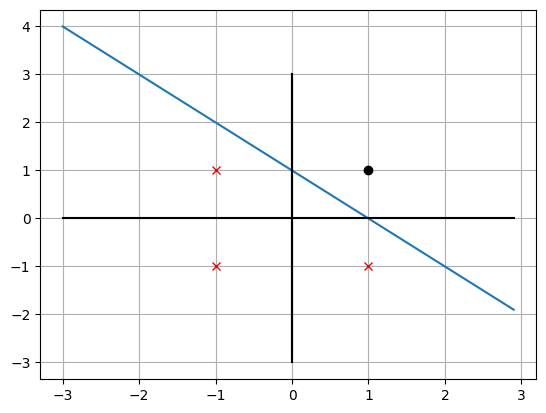

In [ ]:
w=np.array([0, 0, 0])# [w1, w2, last one is bais]
x=[np.array([-1, -1, 1]),
   np.array([-1,  1, 1]),
   np.array([ 1, -1, 1]),
   np.array([ 1,  1, 1])]
t=np.array([-1, -1, -1, 1])

print(w)
print (x)
print (t)
print(len(x))

wb = hebb_rule(x,w,t)
print(wb)
test_hebb_rule(x,wb)
plot_hebb_rule(x, wb, t)

## Implementing OR gate using Hebb Rule:

[0 0 0]
[array([-1, -1,  1]), array([-1,  1,  1]), array([ 1, -1,  1]), array([1, 1, 1])]
[-1  1  1  1]
4
w= [0 0 0]
Ti= -1
Xi= [-1 -1  1]
[ 1  1 -1]
weight vector for this iteration: [ 1  1 -1]
w= [ 1  1 -1]
Ti= 1
Xi= [-1  1  1]
[0 2 0]
weight vector for this iteration: [0 2 0]
w= [0 2 0]
Ti= 1
Xi= [ 1 -1  1]
[1 1 1]
weight vector for this iteration: [1 1 1]
w= [1 1 1]
Ti= 1
Xi= [1 1 1]
[2 2 2]
weight vector for this iteration: [2 2 2]
[2 2 2]
y=(2)X1+(2)X2+(2)b
X1=-1, X2=-1, b=1  => y= -2 
X1=-1, X2=1, b=1  => y= 2 
X1=1, X2=-1, b=1  => y= 2 
X1=1, X2=1, b=1  => y= 6 


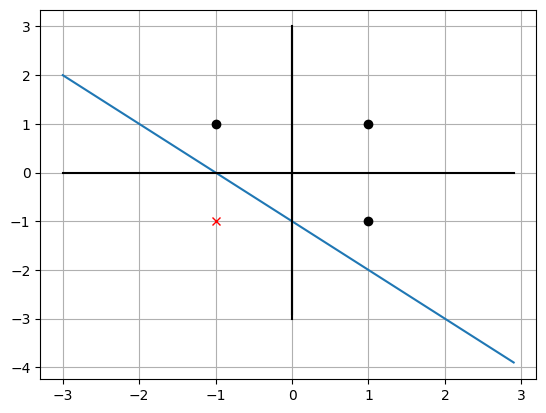

In [ ]:
w=np.array([0, 0, 0])# [w1, w2, last one is bais]
x=[np.array([-1, -1, 1]),
   np.array([-1,  1, 1]),
   np.array([ 1, -1, 1]),
   np.array([ 1,  1, 1])]
t=np.array([-1, 1, 1, 1])

print(w)
print (x)
print (t)
print(len(x))
wb = hebb_rule(x,w,t)
print(wb)
test_hebb_rule(x,wb)
plot_hebb_rule(x, wb, t)

## Implementing XOR gate using Hebb Rule:

[0 0 0]
[array([-1, -1,  1]), array([-1,  1,  1]), array([ 1, -1,  1]), array([1, 1, 1])]
[-1  1  1 -1]
4
w= [0 0 0]
Ti= -1
Xi= [-1 -1  1]
[ 1  1 -1]
weight vector for this iteration: [ 1  1 -1]
w= [ 1  1 -1]
Ti= 1
Xi= [-1  1  1]
[0 2 0]
weight vector for this iteration: [0 2 0]
w= [0 2 0]
Ti= 1
Xi= [ 1 -1  1]
[1 1 1]
weight vector for this iteration: [1 1 1]
w= [1 1 1]
Ti= -1
Xi= [1 1 1]
[0 0 0]
weight vector for this iteration: [0 0 0]
[0 0 0]
y=(0)X1+(0)X2+(0)b
X1=-1, X2=-1, b=1  => y= 0 
X1=-1, X2=1, b=1  => y= 0 
X1=1, X2=-1, b=1  => y= 0 
X1=1, X2=1, b=1  => y= 0 
Can not plot hebbian rule line...


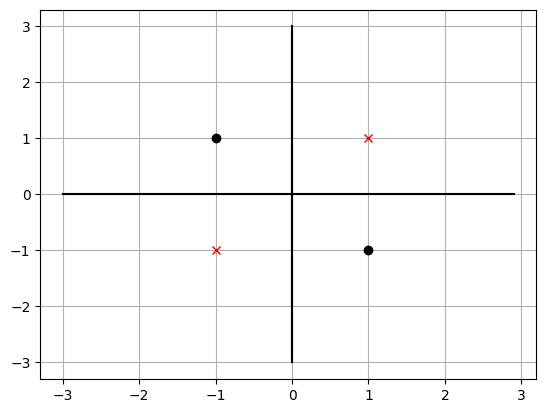

In [ ]:
w=np.array([0, 0, 0])# [w1, w2, last one is bais]
x=[np.array([-1, -1, 1]),
   np.array([-1,  1, 1]),
   np.array([ 1, -1, 1]),
   np.array([ 1,  1, 1])]
t=np.array([-1, 1, 1, -1])

print(w)
print (x)
print (t)
print(len(x))
wb = hebb_rule(x,w,t)
print(wb)
test_hebb_rule(x,wb)
plot_hebb_rule(x, wb, t)